#### `Arbitary Value Imputation`

In [23]:
import numpy as np 
import pandas as pd
import os

In [24]:
data = pd.read_csv("/home/tejas.raval@simform.dom/Desktop/T's Notebook/Titanic-Dataset.csv",usecols=['Age','Fare','Survived'])

In [25]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
def impute_nan(df,Variable):
    df[Variable+"_hundred"] = df[Variable].fillna(100)


In [27]:
impute_nan(data,'Age')

<Axes: >

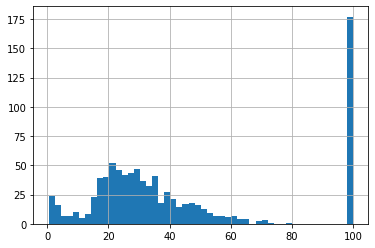

In [28]:
data['Age_hundred'].hist(bins=50)

In [29]:
data.isnull().sum()

Survived         0
Age            177
Fare             0
Age_hundred      0
dtype: int64

In [30]:
data

,Survived,Age,Fare,Age_hundred
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,100.0
889,1,26.0,30.0000,26.0


In [31]:
data.Age.isnull().sum()

177

#### `Frequent Categorical Imputation`

In [32]:
data = pd.read_csv("/home/tejas.raval@simform.dom/Desktop/T's Notebook/loan.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [33]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [34]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [35]:
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

#### Compute the frequency with every feature

<Axes: xlabel='BsmtQual'>

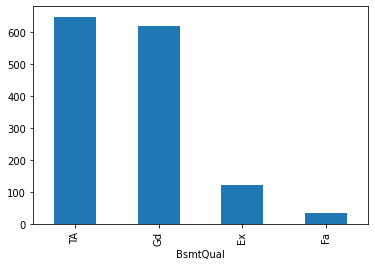

In [36]:
data.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar()

In [44]:
data  = pd.DataFrame(data)

<Axes: xlabel='GarageType'>

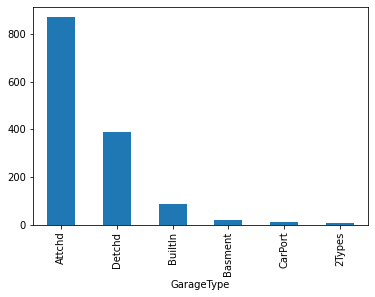

In [47]:
data['GarageType'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

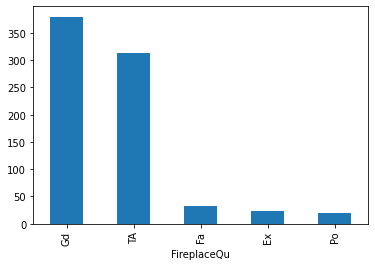

In [48]:
data['FireplaceQu'].value_counts().plot.bar()

In [49]:
def impute_nan(data,variable):
    most_frequent_category = data[variable].value_counts().index[0]
    data[variable].fillna(most_frequent_category,inplace=True) 

In [50]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(data,feature)

In [51]:
data.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### `Adding a variable to capture NAN`

In [52]:
data = pd.read_csv("/home/tejas.raval@simform.dom/Desktop/T's Notebook/loan.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [54]:
data['BsmtQual_var'] = np.where(data['BsmtQual'].isnull(),1,0)

In [55]:
data

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,NaN,Attchd,142125,0


In [56]:
frequent = data['BsmtQual'].mode()[0]
data['BsmtQual'].fillna(frequent,inplace=True)

In [58]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [59]:
data['FireplaceQu_var'] = np.where(data['FireplaceQu'].isnull(),1,0)
frequent = data['FireplaceQu'].mode()[0]
data['FireplaceQu'].fillna(frequent,inplace=True)

In [60]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [38]:
!ollama

Usage:
  ollama [flags]
  ollama [command]

Available Commands:
  serve       Start ollama
  create      Create a model from a Modelfile
  show        Show information for a model
  run         Run a model
  stop        Stop a running model
  pull        Pull a model from a registry
  push        Push a model to a registry
  list        List models
  ps          List running models
  cp          Copy a model
  rm          Remove a model
  help        Help about any command

Flags:
  -h, --help      help for ollama
  -v, --version   Show version information

Use "ollama [command] --help" for more information about a command.


In [39]:
!ollama pull

Error: accepts 1 arg(s), received 0


In [40]:
!ollama list

NAME              ID              SIZE      MODIFIED           
llama3:latest     365c0bd3c000    4.7 GB    About a minute ago    
mistral:latest    f974a74358d6    4.1 GB    2 days ago            


In [41]:
!ollama pull llama3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c... 100% ▕████████████████▏  254 B                         
pulling 577073ffcc6c... 100% ▕████████████████▏  110 B                         
pulling 3f8eb4da87fa... 100% ▕████████████████▏  485 B                         
verifying sha256 digest 
writing manifest 
success 


In [42]:
!ollama serve

Error: listen tcp 127.0.0.1:11434: bind: address already in use


In [43]:
!ollama run llama3

>>> Send a message (/? for help)
Use Ctrl + d or /bye to exit.
>>> Send a message (/? for help)
>>> Send a message (/? for help)

In [44]:
pip install ollama

     |████████████████████████████████| 431 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 3.9 MB/s eta 0:00:011
     |████████████████████████████████| 2.0 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 16.9 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 14.4 MB/s eta 0:00:01
  Using cached exceptiongroup-1.2.2-py3-none-any.whl (16 kB)
     |████████████████████████████████| 58 kB 14.2 MB/s eta 0:00:01
ERROR: googletrans 4.0.0rc1 has requirement httpx==0.13.3, but you'll have httpx 0.28.1 which is incompatible.
  Attempting uninstall: h11
    Found existing installation: h11 0.9.0
    Uninstalling h11-0.9.0:
      Successfully uninstalled h11-0.9.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.9.1
    Uninstalling httpcore-0.9.1:
      Successfully uninstalled httpcore-0.9.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.13.3
    Uninstalling httpx-0.13.3:
      Success

In [45]:
!ollama pull llama3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c... 100% ▕████████████████▏  254 B                         
pulling 577073ffcc6c... 100% ▕████████████████▏  110 B                         
pulling 3f8eb4da87fa... 100% ▕████████████████▏  485 B                         
verifying sha256 digest 
writing manifest 
success 


In [46]:
import ollama

In [53]:
!pip install langchain
!pip install langchain-community
!pip install langchain_ollama

In [54]:
from langchain.prompts.prompt import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_ollama import ChatOllama


information = """
    Cricket is gentlements sports
    """

summary_template = f"""
    given the information {information} about a sport :
    1.A short Summary
    2. two interesting facts about sport
    """

summary_prompt_template = PromptTemplate(
        input_variables=['information'],template=summary_template
    )

llm = ChatOllama(model='llama3')
chain = summary_prompt_template | llm | StrOutputParser()
res = chain.invoke(input={"information":information})

print(res)

**Sport:** Cricket

**Summary:**
Cricket is a bat-and-ball game played by two teams with eleven players on each side. The objective is to score runs by hitting the ball with a bat and running between two sets of three stumps (wickets) while the opposing team tries to stop them by getting the batsmen out.

**Interesting Facts:**

1. **Cricket's Gentlemanly Roots:** Cricket has a long history dating back to the 16th century, and its early popularity among the English gentry gave rise to the nickname "gentlemen's sport." The game was often played on private estates and country clubs, reflecting its associations with aristocracy and refinement.
2. **The Fastest Over in Cricket:** The fastest over (series of six balls) ever bowled in international cricket is held by Shoaib Akhtar of Pakistan, who clocked a remarkable 161.3 km/h (100.7 mph). This incredible speed earned him the nickname "Rawalpindi Express."
